<a href="https://colab.research.google.com/github/Neelhmodi/Cat_vs_Dog_Classification-/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#Genreter
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#Create CNN modal
modal = Sequential()
modal.add(Conv2D(32, (3, 3),padding = 'valid', input_shape = (256, 256, 3), activation = 'relu'))
modal.add(BatchNormalization())
modal.add(MaxPooling2D(pool_size = (2, 2),strides=2,padding = 'valid'))

modal.add(Conv2D(64, (3, 3), activation = 'relu',padding = 'valid'))
modal.add(BatchNormalization())
modal.add(MaxPooling2D(pool_size = (2, 2),strides=2,padding = 'valid'))

modal.add(Conv2D(128, (3, 3), activation = 'relu',padding = 'valid'))
modal.add(BatchNormalization())
modal.add(MaxPooling2D(pool_size = (2, 2),strides=2,padding = 'valid'))

modal.add(Flatten())

modal.add(Dense(units = 128, activation = 'relu'))
modal.add(Dropout(0.1))

modal.add(Dense(units = 64, activation = 'relu'))
modal.add(Dropout(0.1))

modal.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modal.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
modal.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
modal.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 86ms/step - accuracy: 0.5700 - loss: 2.5201 - val_accuracy: 0.6330 - val_loss: 0.6451
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 80ms/step - accuracy: 0.7057 - loss: 0.5750 - val_accuracy: 0.7322 - val_loss: 0.5417
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7574 - loss: 0.4890 - val_accuracy: 0.7710 - val_loss: 0.4755
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.8024 - loss: 0.4244 - val_accuracy: 0.7646 - val_loss: 0.4775
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.8385 - loss: 0.3614 - val_accuracy: 0.7684 - val_loss: 0.5036
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.8702 - loss: 0.2975 - val_accuracy: 0.7730 - val_loss: 0.4860
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9052 - loss: 0.2269 - val_accuracy: 0.7678 - val_loss: 0.6968
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9348 - loss: 0.1647 - 

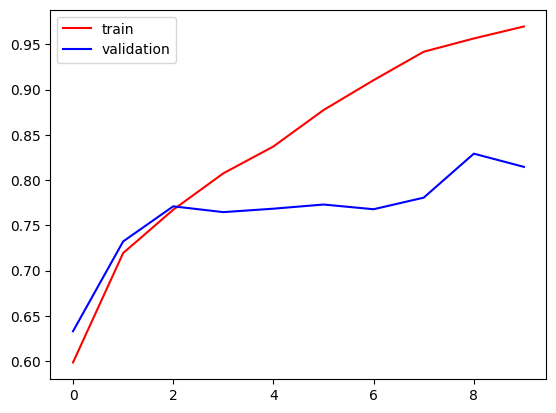

In [ ]:
 #Before BatchNormalization accuracy vs val_accuracy graph
import matplotlib.pyplot as plt
plt.plot(modal.history.history['accuracy'],color='red',label='train')
plt.plot(modal.history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

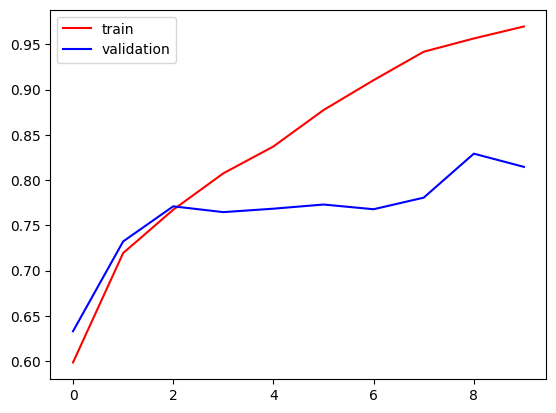

In [ ]:
#After BatchNormalization accuracy vs val_accuracy graph
plt.plot(modal.history.history['accuracy'],color='red',label='train')
plt.plot(modal.history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

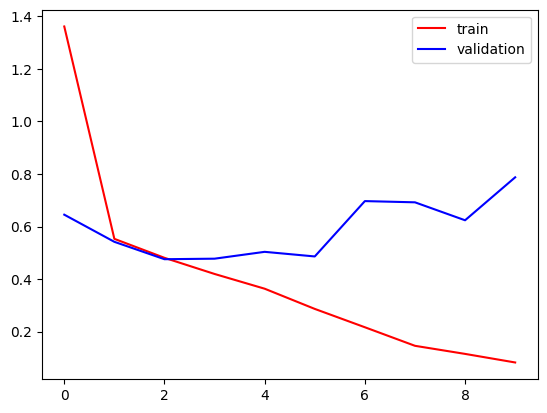

In [ ]:
#Before BatchNormalization loss and val_loss graph
plt.plot(modal.history.history['loss'],color='red',label='train')
plt.plot(modal.history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

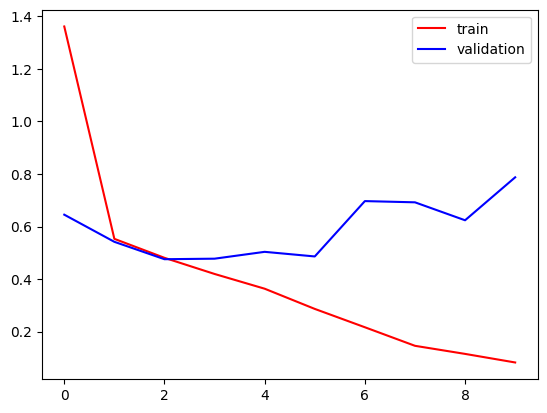

In [ ]:
#After BatchNormalization loss and val_loss graph
plt.plot(modal.history.history['loss'],color='red',label='train')
plt.plot(modal.history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

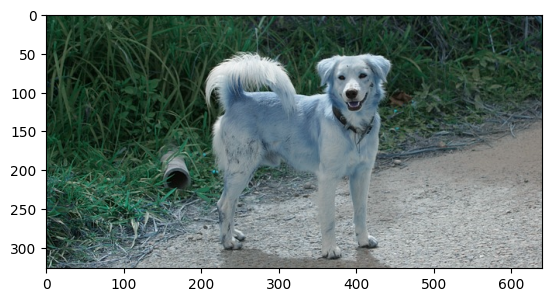

In [ ]:
import cv2
dog_img = cv2.imread('/content/dog-image.jpg')
plt.imshow(dog_img)
plt.show()

In [ ]:
dog_img.shape

(327, 640, 3)

In [ ]:
img1 = cv2.resize(dog_img,(256,256))
img1.shape

(256, 256, 3)

In [ ]:
dog_img_input = img1.reshape((1,256,256,3))
dog_img_input.shape

(1, 256, 256, 3)

In [ ]:
modal.predict(dog_img_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


array([[0.]], dtype=float32)

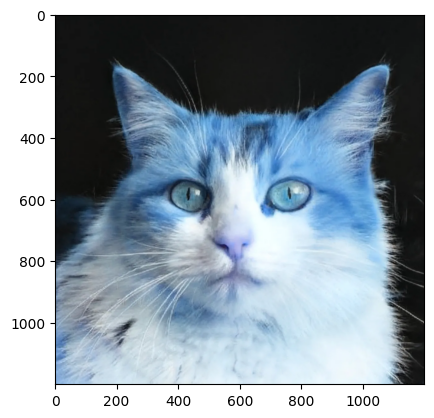

In [ ]:
cat_img = cv2.imread('/content/cat.webp')
plt.imshow(cat_img)
plt.show()

In [ ]:
cat_img.shape

(1200, 1200, 3)

In [ ]:
img2 = cv2.resize(cat_img,(256,256))
img2.shape

(256, 256, 3)

In [ ]:
cat_img_input = img2.reshape((1,256,256,3))
cat_img_input.shape

(1, 256, 256, 3)

In [ ]:
modal.predict(cat_img_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)